In [1]:
cd D:\DATA SCIENCE PROJECTS\DATASETS

D:\DATA SCIENCE PROJECTS\DATASETS


In [2]:
# import libraries
import pandas as pd
import numpy as np


In [3]:
# read the data
df=pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# shape of the data
df.shape

(3276, 10)

There are 3276 rows and 10 columns

In [5]:
# check for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
# Dropping the missing values
#because water quality is a sensitive data ,we cannot tamper with the data by imputing mean,median,mode
df=df.dropna()

In [8]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

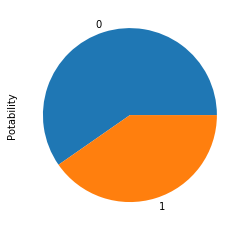

In [11]:
#PLOTS
import matplotlib.pyplot as plt
import seaborn as sns
df.Potability.value_counts().plot(kind='pie')

It is an unbalanced dataset,since 0 is much more 1.so we need to balance the data sothat there is no biasedness

In [12]:
zero = df[df['Potability']==0]#zero values in potability column
one=df[df['Potability']==1]# one values in potability column
from sklearn.utils import resample
#minority class that is 1,we need to unsample/increase that class so that there is no bias
#n_samples=1998 means we want 1998 sample of class 1,sine there are 1998 samples of class 0
df_minority_unsampled=resample(one,replace=True,n_samples=1200)
#concatenate
df=pd.concat([zero,df_minority_unsampled])

from sklearn.utils import shuffle
df=shuffle(df)  #shuffeling so that there is particular sequence

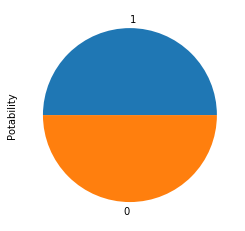

In [13]:
df.Potability.value_counts().plot(kind='pie')

Now its perfect

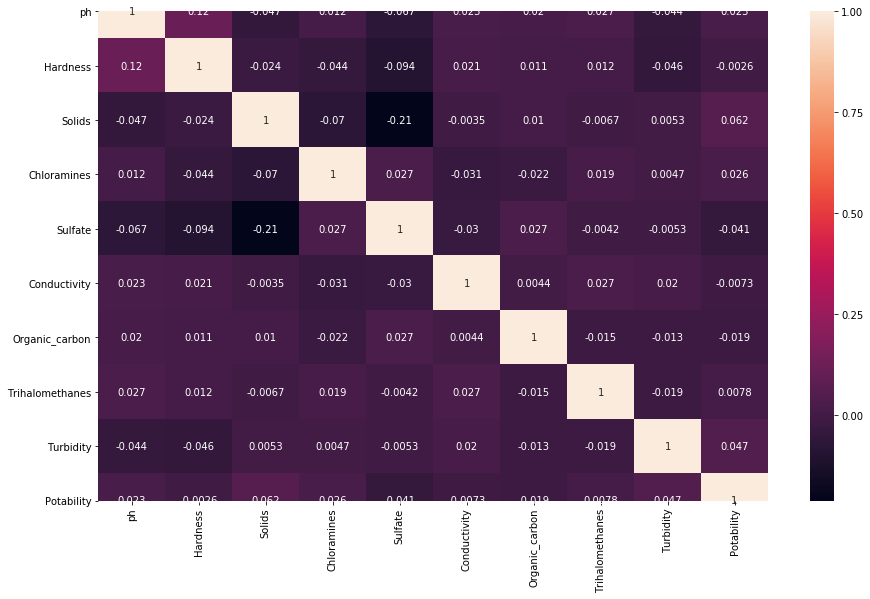

In [14]:
# Understanding correlation
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

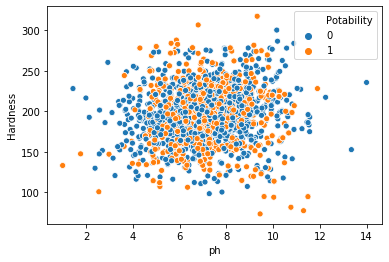

In [15]:
sns.scatterplot(x=df['ph'],y=df['Hardness'],hue=df.Potability,data=df)

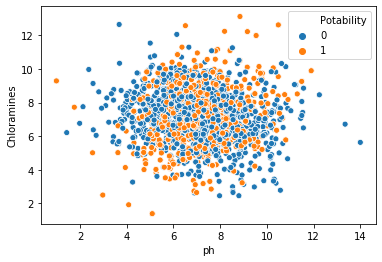

In [17]:
sns.scatterplot(x=df['ph'],y=df['Chloramines'],hue=df.Potability,data=df)

There is no particular pattern

In [18]:
df.corr().abs()['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.061672
Turbidity          0.046738
Sulfate            0.040966
Chloramines        0.025577
ph                 0.022821
Organic_carbon     0.019239
Trihalomethanes    0.007752
Conductivity       0.007258
Hardness           0.002582
Name: Potability, dtype: float64

In [19]:
X=df.drop(['Potability'],axis=1)
y=df['Potability']

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features=X.columns
X[features]=sc.fit_transform(X[features])

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

# Hyper parameter tuning

In [41]:
#hyper parameter tuning

lr=LogisticRegression(random_state=42)
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()

para_knn={'n_neighbors':np.arange(1,50)}#parameters of knn
grid_knn=GridSearchCV(knn,param_grid=para_knn,cv=5)#search knn for 5 fold cross validation


#parameters for decision tree
para_dt={'criterion':['gini','entropy'],'max_depth':np.arange(1,50),'min_samples_leaf':[1,2,45,10,20,30,40,80,100]}
grid_dt=GridSearchCV(dt,param_grid=para_dt,cv=5)#grid search decision tree 5 fold cv
#gini for the giniimpurity and entropy for information gain
#min_samples_leaf:The minimum number of samplesrequired to be at a leaf node,have the effect of smoothing the model


#parameters for randomforest
#n_estimators:The number of trees in the forest
params_rf={'n_estimators':[100,200,350,500],'min_samples_leaf':[2,10,30]}
grid_rf=GridSearchCV(rf,param_grid=params_rf,cv=5)

#parameters for Adaboost
params_ada={'n_estimators':[50,100,250,400,500,600],'learning_rate':[0.2,0.5,0.8,1]}
grid_ada=GridSearchCV(ada,param_grid=params_ada,cv=5)



In [33]:
grid_knn.fit(X_train,y_train)
grid_dt.fit(X_train,y_train)
grid_rf.fit(X_train,y_train)
grid_ada.fit(X_train,y_train)



print("Best parameters for KNN:",grid_knn.best_params_)
print("Best parameters for Decision Tree:",grid_dt.best_params_)
print("Best parameters for RandomForest:",grid_rf.best_params_)
print("Best parameters for AdaBoost:",grid_ada.best_params_)


Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1}
Best parameters for RandomForest: {'min_samples_leaf': 2, 'n_estimators': 500}
Best parameters for AdaBoost: {'learning_rate': 0.8, 'n_estimators': 600}


Applying Bagging and boosting

In [36]:
lr=LogisticRegression(random_state=42)
dt=DecisionTreeClassifier(criterion='entropy',max_depth=42,min_samples_leaf=1,random_state=42)
knn=KNeighborsClassifier(n_neighbors=1)
rf=RandomForestClassifier(n_estimators=100,min_samples_leaf=2,random_state=42)
ada=AdaBoostClassifier(n_estimators=600,learning_rate=1)

#lets also apply bagging and boosting
bagging=BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=46,min_samples_leaf=2,random_state=42)
                          ,n_estimators=100,random_state=42)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=46,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=2,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
     

In [37]:
classifiers=[('LogisticRegression',lr),('K Nearest Neighbors',knn),('Decision Tree',dt),('RandomForest',rf),('AdaBoost',ada),('BaggingClassifier',bagging)]

In [39]:
from sklearn.metrics import accuracy_score

for classifier_name,classifier in classifiers:
    
    # Fit clfto the training set
    classifier.fit(X_train,y_train)
    
    #predict y_pred
    y_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    
    
    #Evaluate clfs accuracy on the test set
    print('{:s}:{:.2f}'.format(classifier_name,accuracy))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression:0.58
K Nearest Neighbors:0.81
Decision Tree:0.76
RandomForest:0.86
AdaBoost:0.65
BaggingClassifier:0.83


RandomForest has better performance

In [40]:
from sklearn.metrics import classification_report

y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       124
           1       0.88      0.83      0.85       116

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



The precision of class 0 is 83% and that of class 1 is 83%.It means the model predicts 83% of claa0 and 83% of class1 correctly


Accuracy is 83%